# Sample использования Phik

interval columns not set, guessing: ['age', 'salary', 'satisfaction']
Phi_k матрица корреляции:
                   age    salary      city  education  is_employed  \
age           1.000000  0.027834  0.045844   0.123023     0.137360   
salary        0.027834  1.000000  0.000000   0.000000     0.038334   
city          0.045844  0.000000  1.000000   0.000000     0.000000   
education     0.123023  0.000000  0.000000   1.000000     0.073407   
is_employed   0.137360  0.038334  0.000000   0.073407     1.000000   
satisfaction  0.128120  0.000000  0.000000   0.000000     0.000000   

              satisfaction  
age                0.12812  
salary             0.00000  
city               0.00000  
education          0.00000  
is_employed        0.00000  
satisfaction       1.00000  


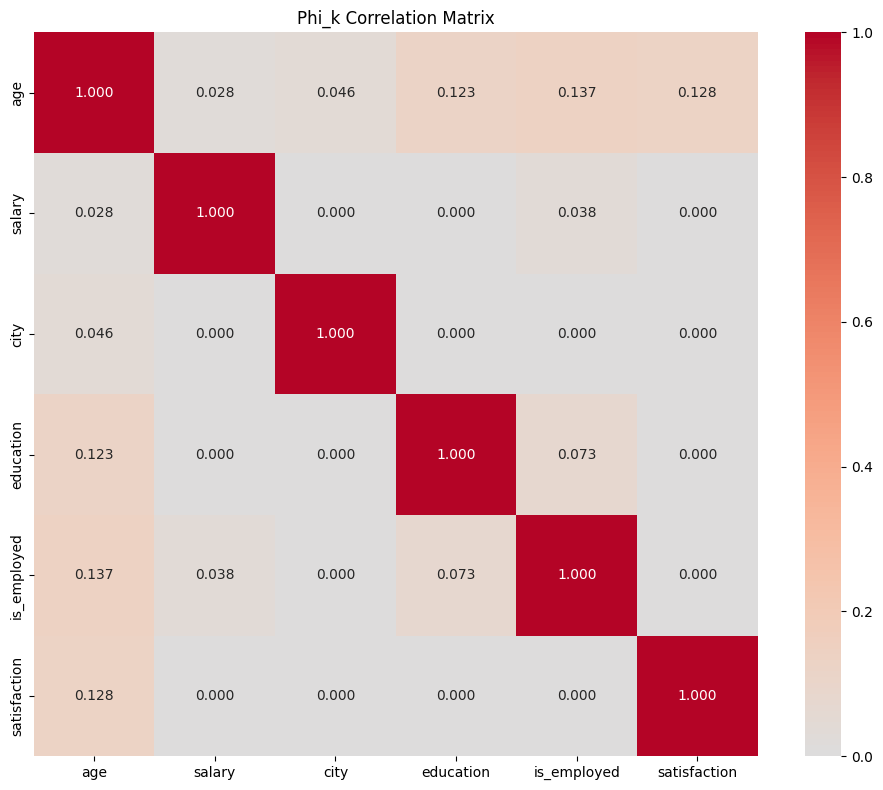

In [2]:
import pandas as pd
import numpy as np
from phik import phik_matrix
import matplotlib.pyplot as plt
import seaborn as sns
# Создаем пример данных с разными типами переменных
np.random.seed(42)
n_samples = 1000

data = {
    'age': np.random.normal(35, 10, n_samples),  # числовая
    'salary': np.random.lognormal(10, 0.5, n_samples),  # числовая
    'city': np.random.choice(['NY', 'LA', 'Chicago'], n_samples),  # категориальная
    'education': np.random.choice(['High School', 'Bachelor', 'Master', 'PhD'], n_samples),  # категориальная
    'is_employed': np.random.choice([True, False], n_samples),  # бинарная
    'satisfaction': np.random.randint(1, 6, n_samples)  # ординальная
}

df = pd.DataFrame(data)

# Создаем матрицу Phi_k корреляции
phik_matrix = df.phik_matrix()
print("Phi_k матрица корреляции:")
print(phik_matrix)


plt.figure(figsize=(10, 8))
sns.heatmap(
    phik_matrix, 
    annot=True, 
    cmap='coolwarm', 
    center=0,
    fmt='.3f',
    square=True
)
plt.title('Phi_k Correlation Matrix')
plt.tight_layout()
plt.show()

# Smote

In [3]:
!pip install imblearn


[notice] A new release of pip is available: 25.0.1 -> 25.3
[notice] To update, run: pip install --upgrade pip


До SMOTE: Counter({0: 945, 1: 55})
После SMOTE: Counter({0: 945, 1: 945})


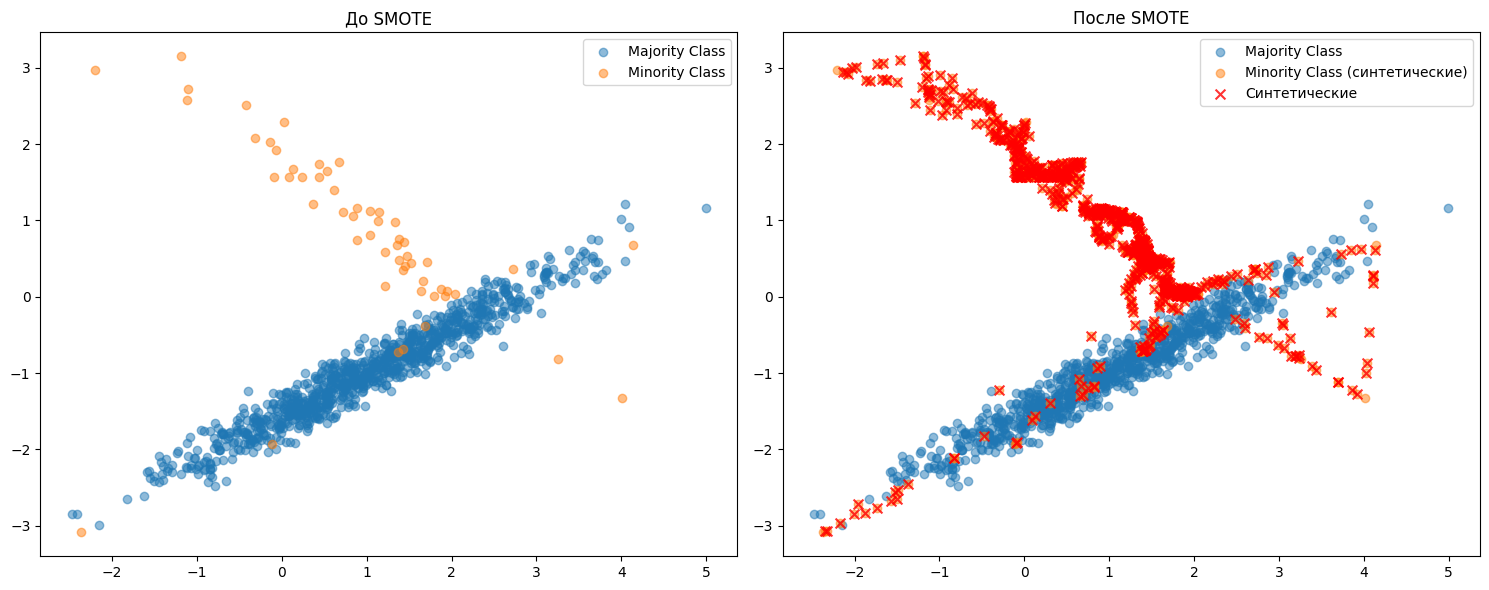

In [4]:
from imblearn.over_sampling import SMOTE
from sklearn.datasets import make_classification
from collections import Counter
import matplotlib.pyplot as plt
import numpy as np

# Создаем дисбалансированный dataset
X, y = make_classification(
    n_samples=1000,
    n_features=2,
    n_redundant=0,
    n_clusters_per_class=1,
    weights=[0.95, 0.05],  
    random_state=42
)

print("До SMOTE:", Counter(y))

# Применяем SMOTE
smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X, y)

print("После SMOTE:", Counter(y_resampled))
def visualize_smote(X, y, X_resampled, y_resampled):
    """Визуализация исходных и синтетических данных"""
    
    plt.figure(figsize=(15, 6))
    
    # До SMOTE
    plt.subplot(1, 2, 1)
    plt.scatter(X[y == 0, 0], X[y == 0, 1], alpha=0.5, label='Majority Class')
    plt.scatter(X[y == 1, 0], X[y == 1, 1], alpha=0.5, label='Minority Class')
    plt.title('До SMOTE')
    plt.legend()
    
    # После SMOTE
    plt.subplot(1, 2, 2)
    plt.scatter(X_resampled[y_resampled == 0, 0], 
                X_resampled[y_resampled == 0, 1], 
                alpha=0.5, label='Majority Class')
    plt.scatter(X_resampled[y_resampled == 1, 0], 
                X_resampled[y_resampled == 1, 1], 
                alpha=0.5, label='Minority Class (синтетические)')
    
    # Подсвечиваем синтетические примеры
    original_minority_indices = np.where(y == 1)[0]
    synthetic_indices = np.where(y_resampled == 1)[0]
    synthetic_indices = synthetic_indices[~np.isin(synthetic_indices, original_minority_indices)]
    
    plt.scatter(X_resampled[synthetic_indices, 0], 
                X_resampled[synthetic_indices, 1], 
                alpha=0.8, marker='x', s=50, label='Синтетические', color='red')
    
    plt.title('После SMOTE')
    plt.legend()
    plt.tight_layout()
    plt.show()

visualize_smote(X, y, X_resampled, y_resampled)

In [6]:
!pip install boruta

from boruta import BorutaPy
from sklearn.ensemble import RandomForestClassifier
from sklearn.datasets import load_breast_cancer

X, y = load_breast_cancer(return_X_y=True)

rf = RandomForestClassifier(n_estimators=100, n_jobs=-1, class_weight='balanced')

boruta = BorutaPy(
    estimator=rf,
    n_estimators='auto',
    max_iter=50  # число итераций отбора
)

boruta.fit(X, y)

# Важные признаки
important_features = boruta.support_

# Признаки "на грани"
tentative = boruta.support_weak_

print("Важные признаки:", important_features)
print("Сомнительные:", tentative)





[notice] A new release of pip is available: 25.0.1 -> 25.3
[notice] To update, run: pip install --upgrade pip
Важные признаки: [ True  True  True  True  True  True  True  True False False  True False
  True  True False False  True  True False False  True  True  True  True
  True  True  True  True  True  True]
Сомнительные: [False False False False False False False False False False False False
 False False False False False False False False False False False False
 False False False False False False]
